# H$_\text{2}$-Companion 

Diese .ipynb Datei, enthält den Code für die Implementierung von Methoden aus *Rhodium*. 


Author: José Heinz Santos B.Sc.

* Erstmal werden die notwendige *Packages* und *Libraries* aufgerufen. 

In [3]:
import numpy as np   # Für die mathematische Grundlagen, die benutzt werden.
import matplotlib.pyplot as plt   # Für die Schaubilder
import tensorflow as tf   # Für die Implementierung von Machine Learning und Tensorflow
import rhodium    # Rhobust Decision Making
import scipy.signal as sig   # Für die Signalverarbeitung
from rhodium import *   # Mehr Rhodium 
import networkx as nx   # Mehr zu Tensorflow
from rhodium import Model, sample_lhs, update, evaluate, sa, DataSet   #...Rhodium
import pandas as pd # Für die Excel Tabellen mit den Preisen

* Jetzt wird eine Prognose der Strompreise, der Wasserstoffpreise und der Benzinpreise für den Wasserstofftransport mittels der Generierung von mikroökonomischen Funktionen erstellt. Anschließend werden zur besseren Verständlichkeit dieser Funktionen Tools aus dem Bereich Deep Learning oder Machine Learning eingesetzt.

### Diesel Prices

Aus dem Dokument vom *Destatis*.


   Year   Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6
0  2008   97.61         NaN         NaN         NaN         NaN         NaN
1  2009   82.63         NaN         NaN         NaN         NaN         NaN
2  2010   88.87         NaN         NaN         NaN         NaN         NaN
3  2011  104.79         NaN         NaN         NaN         NaN         NaN
4  2012  116.36         NaN         NaN         NaN         NaN         NaN


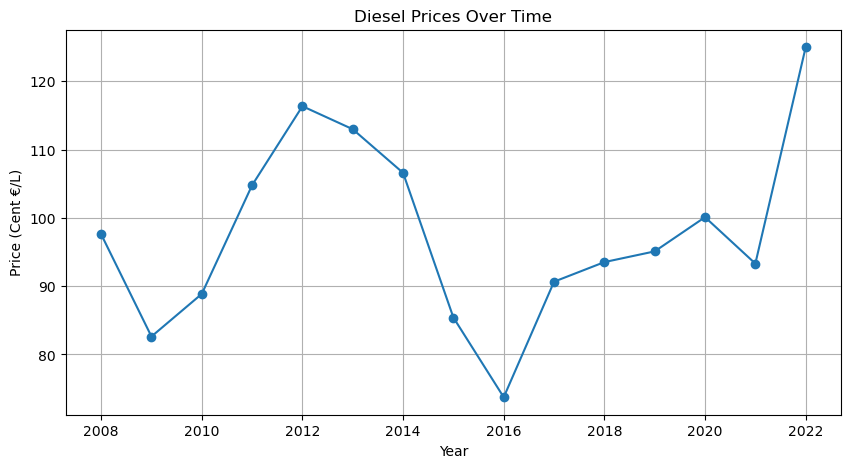

In [6]:

# Excel File hochladen
file_path = 'diesel-Table 1.csv'
diesel_data = pd.read_csv(file_path, delimiter=';')

# Erste Daten zeigen
print(diesel_data.head())

# Limpiar informacion
diesel_data = diesel_data[['Year', 'Price']]

diesel_data['Year'] = diesel_data['Year'].astype(float)
diesel_data['Price'] = diesel_data['Price'].astype(float)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(diesel_data['Year'], diesel_data['Price'], marker='o')

plt.title('Diesel Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Cent €/L)')
plt.grid(True)

#Zeigen
plt.show()

Hier werden nur die Daten auf einem Schaubild gezeigt. Die Achsen sind beschriftet mit den Einheiten, die dazu gehören

In [7]:
diesel_data

,Year,Price
0,2008.0,97.61
1,2009.0,82.63
2,2010.0,88.87
3,2011.0,104.79
4,2012.0,116.36
5,2013.0,112.99
6,2014.0,106.60
7,2015.0,85.41
8,2016.0,73.74
9,2017.0,90.66


### Electricity Prices
*Destatis*

     Year  Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6
0  2008.0   9.59         NaN         NaN         NaN         NaN         NaN
1  2008.5   9.57         NaN         NaN         NaN         NaN         NaN
2  2009.0  10.02         NaN         NaN         NaN         NaN         NaN
3  2009.5  10.07         NaN         NaN         NaN         NaN         NaN
4  2010.0   9.93         NaN         NaN         NaN         NaN         NaN


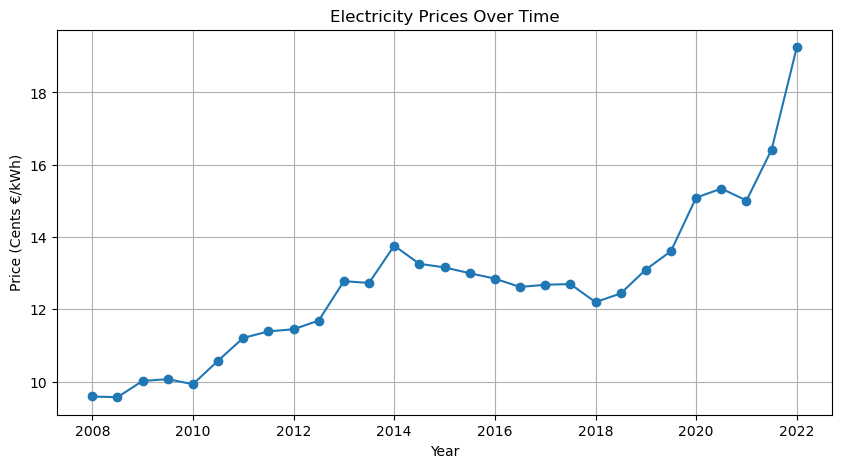

In [9]:

file_path = 'electricity-Table 1.csv'
electricity_data = pd.read_csv(file_path, delimiter=';')


print(electricity_data.head())


electricity_data = electricity_data[['Year', 'Price']]


electricity_data['Year'] = electricity_data['Year'].astype(float)
electricity_data['Price'] = electricity_data['Price'].astype(float)


plt.figure(figsize=(10, 5))
plt.plot(electricity_data['Year'], electricity_data['Price'], marker='o')


plt.title('Electricity Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Cents €/kWh)')
plt.grid(True)


plt.show()

In [10]:
electricity_data

,Year,Price
0,2008.0,9.59
1,2008.5,9.57
2,2009.0,10.02
3,2009.5,10.07
4,2010.0,9.93
5,2010.5,10.58
6,2011.0,11.21
7,2011.5,11.39
8,2012.0,11.45
9,2012.5,11.69


## Deep Learning und Tensorflow

#### Einführung
Manchmal sind lineare Modelle nicht ausreichend, um die Phänomene der realen Welt zu erfassen, und daher sind nichtlineare Modelle notwendig. Bei der Regression haben all diese Modelle die gleiche Grundform, d. h.,
$$\underline{y} = f(\underline{x}),$$
In der linearen Regression haben wir $f(\underline{x}) = W\underline{x} + b$; die Parameter W und b müssen an die Daten angepasst werden. Welche nichtlineare Funktion wählen wir? Grundsätzlich könnte $f(\underline{x})$ alles Mögliche sein.

#### Was wird denn hier gemacht? 
Durch Regression, die kommenden Preisen vorherzusagen!

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 - 1s - 37ms/step - loss: 0.0433
Epoch 2/100
16/16 - 0s - 1ms/step - loss: 0.0105
Epoch 3/100
16/16 - 0s - 1ms/step - loss: 0.0095
Epoch 4/100
16/16 - 0s - 1ms/step - loss: 0.0073
Epoch 5/100
16/16 - 0s - 1ms/step - loss: 0.0081
Epoch 6/100
16/16 - 0s - 1ms/step - loss: 0.0076
Epoch 7/100
16/16 - 0s - 1ms/step - loss: 0.0089
Epoch 8/100
16/16 - 0s - 1ms/step - loss: 0.0074
Epoch 9/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 10/100
16/16 - 0s - 1ms/step - loss: 0.0060
Epoch 11/100
16/16 - 0s - 1ms/step - loss: 0.0062
Epoch 12/100
16/16 - 0s - 1ms/step - loss: 0.0062
Epoch 13/100
16/16 - 0s - 1ms/step - loss: 0.0063
Epoch 14/100
16/16 - 0s - 1ms/step - loss: 0.0075
Epoch 15/100
16/16 - 0s - 1ms/step - loss: 0.0069
Epoch 16/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 17/100
16/16 - 0s - 1ms/step - loss: 0.0066
Epoch 18/100
16/16 - 0s - 1ms/step - loss: 0.0063
Epoch 19/100
16/16 - 0s - 1ms/step - loss: 0.0073
Epoch 20/100
16/16 - 0s - 1ms/step - loss: 0.0070
Epoch 21/100
16/16 -

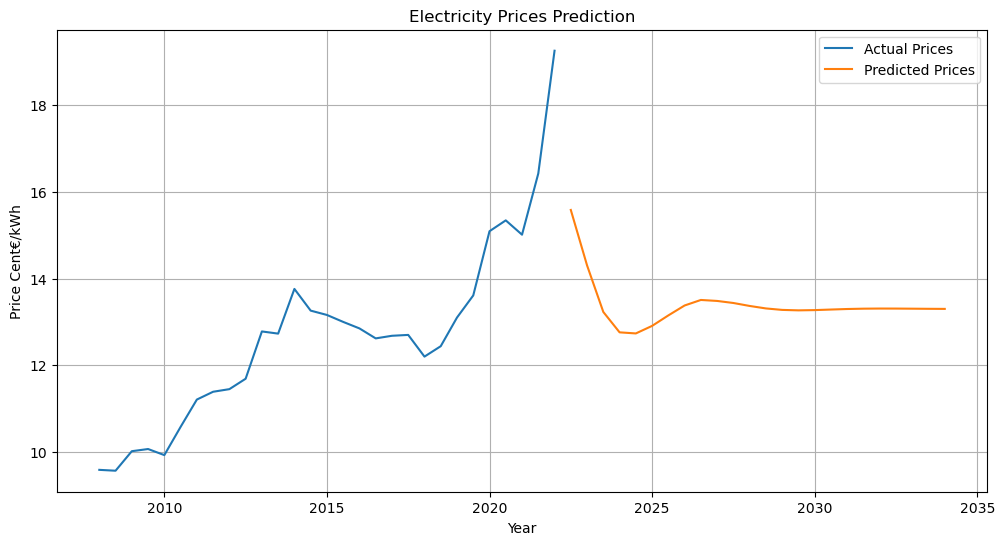

      Year  Predicted Price
0   2022.5        15.580283
1   2023.0        14.302017
2   2023.5        13.228847
3   2024.0        12.759283
4   2024.5        12.734171
5   2025.0        12.908001
6   2025.5        13.149935
7   2026.0        13.378286
8   2026.5        13.505584
9   2027.0        13.483079
10  2027.5        13.435713
11  2028.0        13.367502
12  2028.5        13.310283
13  2029.0        13.276495
14  2029.5        13.265972
15  2030.0        13.271829
16  2030.5        13.284842
17  2031.0        13.297130
18  2031.5        13.304726
19  2032.0        13.307752
20  2032.5        13.307034
21  2033.0        13.304465
22  2033.5        13.301676
23  2034.0        13.299644


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Data nehmen (aus Excel)
data = {
    'Year': electricity_data['Year'],
    'Price': electricity_data['Price']
}
df = pd.DataFrame(data)

# Data bearbeiten
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Sequence erstellen
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 9
X, y = create_sequences(df['Price'].values, sequence_length)

# Data bearbeiten
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitten
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train 
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Prognose
predictions = []
current_input = df['Price'].values[-sequence_length:].reshape((1, sequence_length, 1))

for _ in range(24):  # Predict for 12 years ahead (2 half-year steps per year)
    next_price = model.predict(current_input)[0][0]
    predictions.append(next_price)
    next_price_reshaped = np.array(next_price).reshape((1, 1, 1))
    current_input = np.append(current_input[:, 1:, :], next_price_reshaped, axis=1)

# Inverse Transformation
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_years = np.arange(2022.5, 2034.5, 0.5)


print(f"Length of future_years: {len(future_years)}")
print(f"Length of predictions: {len(predictions)}")


if len(future_years) == len(predictions):
    predictions_df_el = pd.DataFrame({'Year': future_years, 'Predicted Price': predictions.flatten()})

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], scaler.inverse_transform(df['Price'].values.reshape(-1, 1)), label='Actual Prices')
    plt.plot(predictions_df_el['Year'], predictions_df_el['Predicted Price'], label='Predicted Prices')
    plt.xlabel('Year')
    plt.ylabel('Price Cent€/kWh')
    plt.title('Electricity Prices Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(predictions_df_el)
else:
    print("Lengths of future_years and predictions do not match.")

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 1s - 68ms/step - loss: 0.2579
Epoch 2/100
9/9 - 0s - 1ms/step - loss: 0.1860
Epoch 3/100
9/9 - 0s - 1ms/step - loss: 0.1113
Epoch 4/100
9/9 - 0s - 1ms/step - loss: 0.0897
Epoch 5/100
9/9 - 0s - 1ms/step - loss: 0.0873
Epoch 6/100
9/9 - 0s - 1ms/step - loss: 0.0854
Epoch 7/100
9/9 - 0s - 1ms/step - loss: 0.0825
Epoch 8/100
9/9 - 0s - 1ms/step - loss: 0.0821
Epoch 9/100
9/9 - 0s - 1ms/step - loss: 0.0870
Epoch 10/100
9/9 - 0s - 1ms/step - loss: 0.0800
Epoch 11/100
9/9 - 0s - 1ms/step - loss: 0.0761
Epoch 12/100
9/9 - 0s - 1ms/step - loss: 0.0774
Epoch 13/100
9/9 - 0s - 1ms/step - loss: 0.0742
Epoch 14/100
9/9 - 0s - 1ms/step - loss: 0.0724
Epoch 15/100
9/9 - 0s - 1ms/step - loss: 0.0722
Epoch 16/100
9/9 - 0s - 1ms/step - loss: 0.0716
Epoch 17/100
9/9 - 0s - 1ms/step - loss: 0.0757
Epoch 18/100
9/9 - 0s - 2ms/step - loss: 0.0786
Epoch 19/100
9/9 - 0s - 2ms/step - loss: 0.0701
Epoch 20/100
9/9 - 0s - 1ms/step - loss: 0.0683
Epoch 21/100
9/9 - 0s - 1ms/step - loss: 0.0667
Epoch 22/100

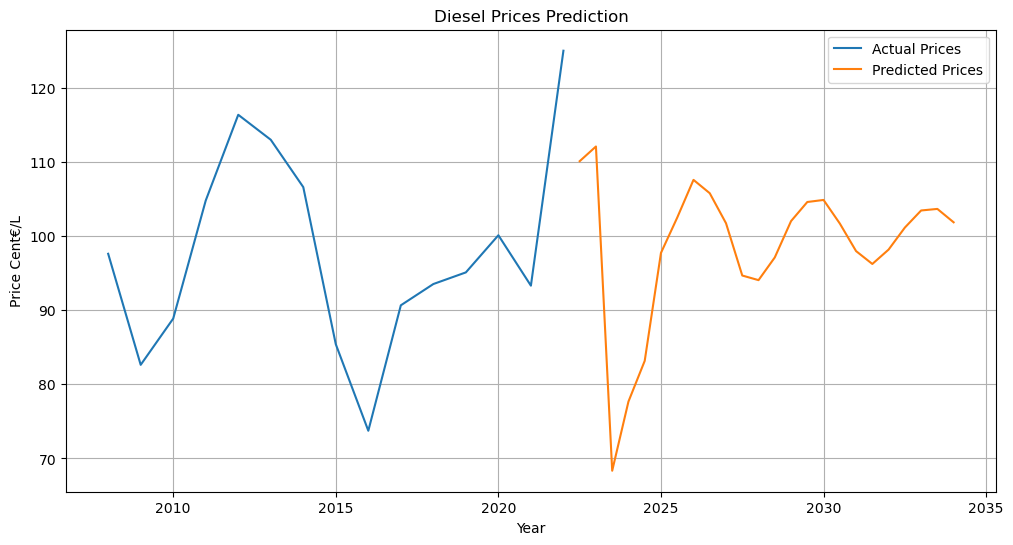

      Year  Predicted Price
0   2022.5       110.099083
1   2023.0       112.081558
2   2023.5        68.347931
3   2024.0        77.678383
4   2024.5        83.166374
5   2025.0        97.729233
6   2025.5       102.493080
7   2026.0       107.581184
8   2026.5       105.778938
9   2027.0       101.730469
10  2027.5        94.677963
11  2028.0        94.054192
12  2028.5        97.117477
13  2029.0       102.016869
14  2029.5       104.594765
15  2030.0       104.871628
16  2030.5       101.690781
17  2031.0        97.971375
18  2031.5        96.236259
19  2032.0        98.176697
20  2032.5       101.143562
21  2033.0       103.450584
22  2033.5       103.662170
23  2034.0       101.855797


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = {
    'Year': diesel_data['Year'],
    'Price': diesel_data['Price']
}
df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 3
X, y = create_sequences(df['Price'].values, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

predictions = []
current_input = df['Price'].values[-sequence_length:].reshape((1, sequence_length, 1))

for _ in range(24):  # Predict for 12 years ahead (2 half-year steps per year)
    next_price = model.predict(current_input)[0][0]
    predictions.append(next_price)
    next_price_reshaped = np.array(next_price).reshape((1, 1, 1))
    current_input = np.append(current_input[:, 1:, :], next_price_reshaped, axis=1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_years = np.arange(2022.5, 2034.5, 0.5)

print(f"Length of future_years: {len(future_years)}")
print(f"Length of predictions: {len(predictions)}")

if len(future_years) == len(predictions):
    predictions_df_diesel = pd.DataFrame({'Year': future_years, 'Predicted Price': predictions.flatten()})

    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], scaler.inverse_transform(df['Price'].values.reshape(-1, 1)), label='Actual Prices')
    plt.plot(predictions_df_diesel['Year'], predictions_df_diesel['Predicted Price'], label='Predicted Prices')
    plt.xlabel('Year')
    plt.ylabel('Price Cent€/L')
    plt.title('Diesel Prices Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(predictions_df_diesel)
else:
    print("Lengths of future_years and predictions do not match.")

### Hydrogen Prices (Hier kein Tensorflow nötig) 

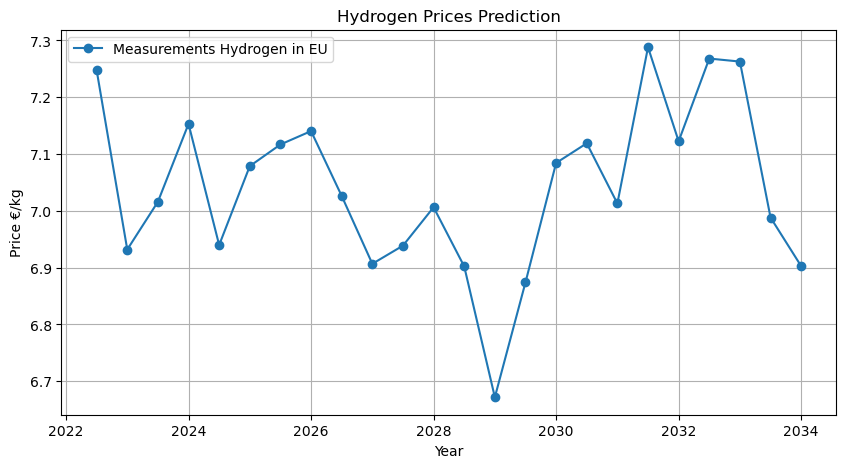

In [14]:
def hydrogen_prices(
    N_samples_h: int = 24,
    noise_sig_h: float = 0.1,
    noise_explosion_h: float = 0.7,
    explosion_year_sample_h: int = 230 # This is year 2020 in x[explosion_year_sample] = 2020
                      )->float:
    # Data preparation
    x = np.linspace(2022.5, 2034.0, N_samples_h, dtype=np.float32)
    y = 7+((x-2023)/40)*np.sin(x-1) + noise_sig_h * np.random.randn(N_samples_h).astype(np.float32)
    y[explosion_year_sample_h:explosion_year_sample_h+25] = (13+
                                            ((x[explosion_year_sample_h:explosion_year_sample_h+25]-2023)/40)*
                                             np.sin(x[explosion_year_sample_h:explosion_year_sample_h+25]-1) + 
         noise_explosion_h)
    y_true = 13+((x-2023)/40)*np.sin(x-1)
    
    return (x,y,y_true)

    
def plot_hydrogen_prices(
    x: float = 0, 
    y: float = 0, 
    y_true: float = 0
                            ): 
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o')
    #plt.plot(x, y_true)
    plt.legend(["Measurements Hydrogen in EU", "Ground truth"])
    #plt.show()
    plt.xlabel('Year')
    plt.ylabel('Price €/kg')
    plt.title('Hydrogen Prices Prediction')
    plt.grid(True)
    

(x_h,y_h,y_true_h) = hydrogen_prices()
plot_hydrogen_prices(x_h,y_h,y_true_h)

* Jetzt wird die Funktion des NPV (Net Present Value) definiert.

## Preise und Plötzliche Änderungen 

-Nun wird definiert, dass es für die prognostizierten Preise mittels Deep Learning zwei neue Variablen im Code gibt, die das Jahr bestimmen, in dem es zu einer drastischen Änderung der Preise für Benzin, Strom und Wasserstoff kommen kann, und eine weitere Variable, die den Prozentsatz definiert, um den der Preis in diesem Jahr steigen wird. Diese Variablen dienen dann der Analyse in Rhodium, die im nächsten Codeblock durchgeführt wird.


-Auch gibt es eine Funktion, die den Gewinn eines einzelnen Elektrolyseurs zur Erzeugung von Wasserstoff definiert.


## NPV Funktion

Die Funktion npv (Net Present Value) ist die typische. Sie erhält als Eingaben den Cashflow über die Jahre und gibt als Ausgabe einen Preis oder Wert zurück.

$$NPV = \sum_{t = 2022}^{2034}\frac{CF(t)}{(1+\gamma ^{t})}.$$

In [16]:
import numpy_financial as npf #für NPV

def prediction_h2(
    h_price: np.ndarray,
    years: np.ndarray,
    volatility_year_h2: int = 2026,
    volatility_coeff_h2: float = 1.3 
                 )->float:
    h_prices = h_price.copy()
    location_array = np.where(years == volatility_year_h2)[0]    
    h_prices[location_array] = volatility_coeff_h2*h_prices[location_array]
    
    return h_prices


def prediction_diesel(
    diesel_price: np.ndarray,
    years: np.ndarray,
    volatility_year_diesel: int = 2027,
    volatility_coeff_diesel: float = 1.3 
                 )->float:
    diesel_prices = diesel_price.copy()
    location_array = np.where(years == volatility_year_diesel)[0]    
    diesel_prices[location_array] = volatility_coeff_diesel*diesel_prices[location_array]
    
    return diesel_prices


def prediction_electricity(
    elec_price: np.ndarray,
    years: np.ndarray,
    volatility_year_elec: int = 2025,
    volatility_coeff_elec: float = 1.5 
                 )->float:
    elec_prices = elec_price.copy() 
    location_array = np.where(years == volatility_year_elec)[0]    
    elec_prices[location_array] = volatility_coeff_elec*elec_prices[location_array]
    
    return elec_prices

def electrolysis_win(
    electricity_prices: np.ndarray, #[cent EURO/kWh] 
    h_price: np.ndarray, #[EURO/kg]
    #diesel_prices: np.ndarray, #[cent EURO/L] 
    t_electro: float = 8000, #[h]
    eta_h2: float = 0.99 #Wirkungsgrad Elektrolyseur [kWh/kg]
    #rate: float = 0.027 #Rate []
                    )->float:
    win = []
    loss = []
    
    for i in range(len(electricity_prices)):
        loss.append((electricity_prices[i]/100)*(t_electro))
        
    for i in range(len(h_price)):
        win.append(h_price[i] * t_electro * (1 / eta_h2))
        
    win = np.array(win)
    loss = np.array(loss)
    ertrag = win-loss
    #NPV = npf.npv(rate, ertrag)
    
    return ertrag


def npv(
    #h_price,
    #elec_price: np.ndarray,
    #diesel_price: np.ndarray,
    #years: np.ndarray,
    volatility_year_h2: int = 2026,
    volatility_coeff_h2: float = 1.3,
    #years: np.ndarray,
    volatility_year_diesel: int = 2027,
    volatility_coeff_diesel: float = 1.3,
    #years: np.ndarray,
    volatility_year_elec: int = 2025,
    volatility_coeff_elec: float = 1.5,
    #electricity_prices: np.ndarray, #[cent EURO/kWh] 
    #h_price: np.ndarray, #[EURO/kg]
    #diesel_prices: np.ndarray, #[cent EURO/L] 
    t_electro: float = 8000, #[h]
    eta_h2: float = 0.99, #Wirkungsgrad Elektrolyseur [kWh/kg]
    rate: float = 0.027 #Rate []
        )->float: 
    
    # Preise Berechnen
    price_h2 = prediction_h2(y_h,x_h,volatility_year_h2,volatility_coeff_h2)
    price_diesel = prediction_diesel(predictions_df_diesel['Predicted Price'],
                                     x_h,volatility_year_diesel,volatility_coeff_diesel)
    price_elec = prediction_electricity(predictions_df_el['Predicted Price'],
                                        x_h,volatility_year_elec,volatility_coeff_elec)
    
    # Gewinn Elektrolyseur: 
    ertrag_vector = electrolysis_win(price_elec,price_h2,t_electro,eta_h2)
    
    #npv Berechnen:
    max_ertrag = np.max(ertrag_vector)
    min_ertrag = np.min(ertrag_vector)
    npv = npf.npv(rate, ertrag_vector)
    
    return (npv,max_ertrag,min_ertrag)

In [17]:
npv1,ertrag_max,ertrag_min = npv()
#npv1
#ertrag_min
ertrag_max

73939.46264247702

## Model für die NPV

In [19]:
## Now we define the model!
def return_model()-> Model:
    model = Model(npv)
    
    model.parameters = [
        Parameter("volatility_year_h2"),
        Parameter("volatility_coeff_h2"),
        Parameter("volatility_year_diesel"),
        Parameter("volatility_coeff_diesel"),
        Parameter("volatility_year_elec"),
        Parameter("volatility_coeff_elec"),
        Parameter("t_electro"),
        Parameter("eta_h2"),
        Parameter("rate")]
    
    model.responses = [
        Response("npv", Response.MAXIMIZE),
        Response("max_ertrag", Response.MAXIMIZE),
        Response("min_ertrag", Response.MAXIMIZE)]
    
    #model.constraints = [Constraint("b >= 0.95")]
    
    model.uncertainties = [IntegerUncertainty("volatility_year_h2", 2023, 2033),
                           UniformUncertainty("volatility_coeff_h2", 1.1, 5.0),
                           IntegerUncertainty("volatility_year_diesel", 2023, 2033),
                           UniformUncertainty("volatility_coeff_diesel", 1.1, 5.0),
                           IntegerUncertainty("volatility_year_elec", 2023, 2033),
                           UniformUncertainty("volatility_coeff_elec", 1.1, 5.0),
                           UniformUncertainty("eta_h2",0.9,1.0),
                           UniformUncertainty("rate",0.02,0.05)
                          ]
    
    model.levers = [
                    RealLever("t_electro", 6000, 8400, length = 1)
                    ]
    
    return model


model = return_model();

In [20]:
# 100 SOWs/futures are evaluated. Can be reduced for fast model runs.
SOWs = sample_lhs(model, 10000)
model_results = evaluate(model, SOWs)

In [21]:
output_optimization = optimize(model, "NSGAII", 1000)
output_optimization

[OrderedDict([('t_electro', 8399.999940476195),
              ('npv', 1067729.7752099698),
              ('max_ertrag', 77636.4352244561),
              ('min_ertrag', 55494.03181320865)])]

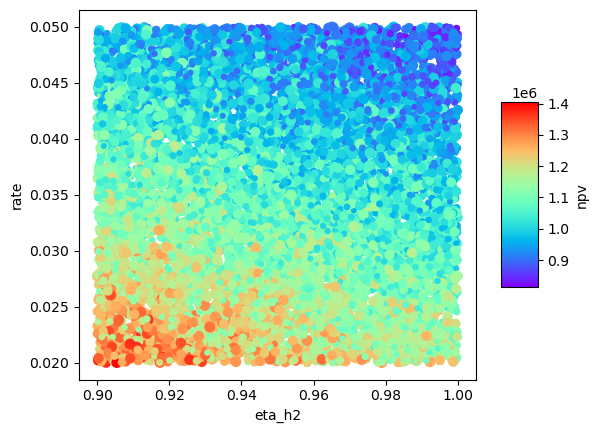

In [22]:
fig1 = scatter2d(model, model_results, x="eta_h2", y="rate", c = "npv")

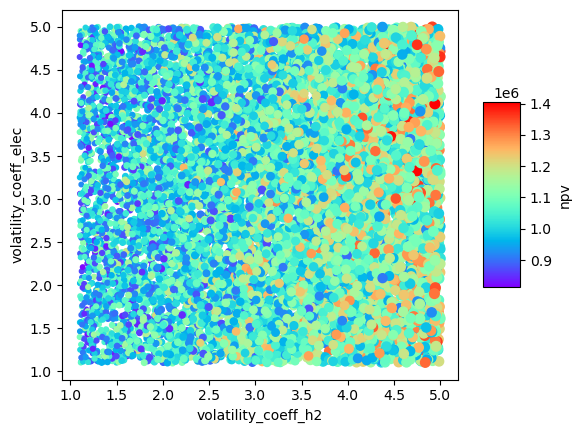

In [23]:
fig2 = scatter2d(model, model_results, x="volatility_coeff_h2", y="volatility_coeff_elec", c = "npv")

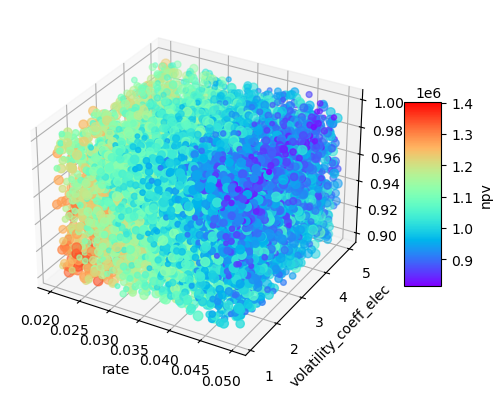

In [24]:
fig3 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "npv")

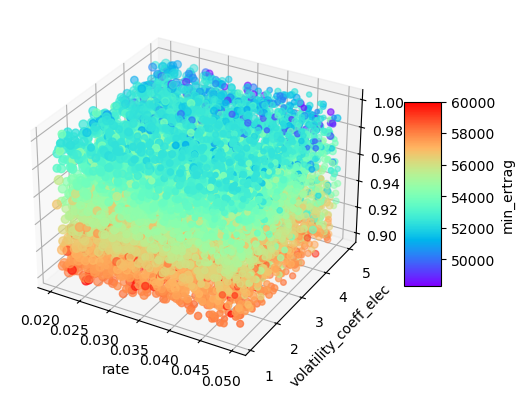

In [25]:
fig4 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "min_ertrag")

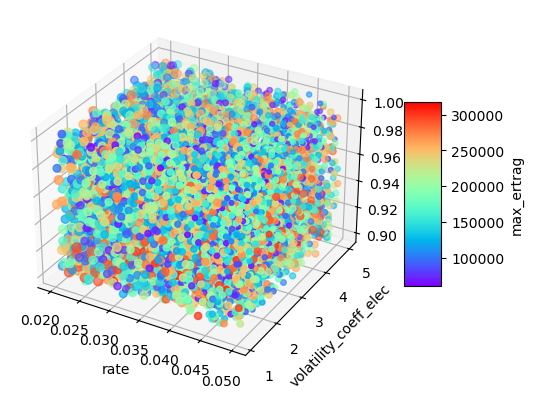

In [26]:
fig5 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "max_ertrag")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


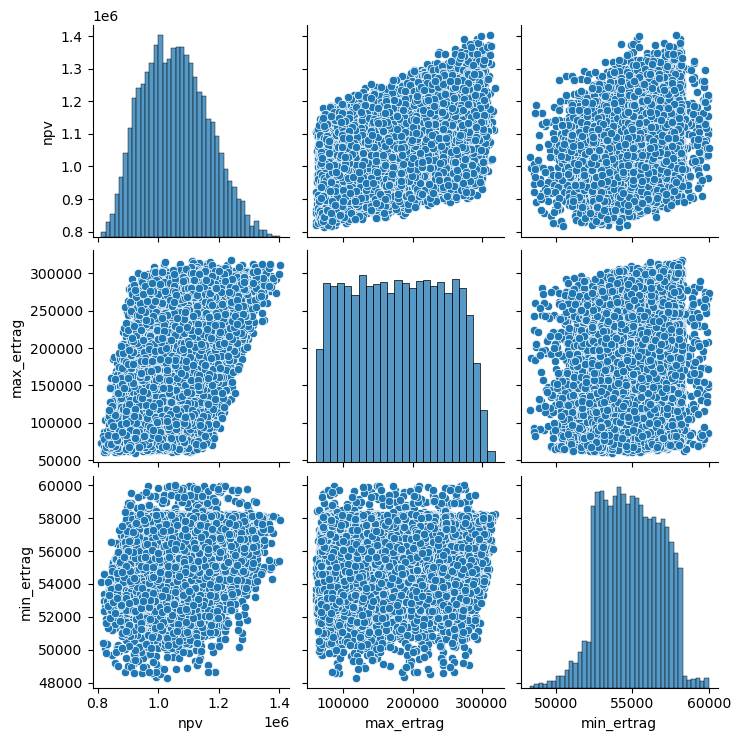

In [27]:
fig6 = pairs(model, model_results)

/Users/joseheinz/Documents/Arbeit/Fraunhofer/rhodium/Rhodium/rhodium/plot.py:811: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df_min[i] if model.responses[df.columns.values[i]].dir == Response.MINIMIZE else df_max[i]
/Users/joseheinz/Documents/Arbeit/Fraunhofer/rhodium/Rhodium/rhodium/plot.py:827: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df_max[i] if model.responses[df.columns.values[i]].dir == Response.MINIMIZE else df_min[i]


AttributeError: 'Colorbar' object has no attribute 'set_clim'

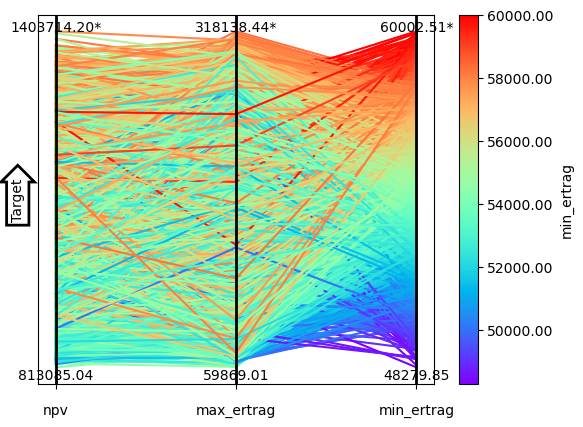

In [28]:
fig7 = parallel_coordinates(model,model_results, colormap="rainbow", target="top")